## Student Information

Please enter the names and IDs of the two students below:

1. **Name**: Peter Atef  
   **ID**: `9202395`

2. **Name**: Beshoy Morad  
   **ID**: `9202405`


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities.




## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


In [2]:
##Import all needed libraries
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io

'''
##The dataset is loaded to your GDrive so need to be mounted
from google.colab import drive
drive.mount('/content/drive')
'''

"\n##The dataset is loaded to your GDrive so need to be mounted\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

The PCA (Principal Component Analysis) algorithm, found within the `sklearn.decomposition` module, is widely utilized in machine learning for reducing the dimensionality of datasets. Its primary goal is to identify essential patterns or structures within the data.

In the realm of image processing, PCA serves to decrease the dimensionality of images by extracting a smaller set of features that capture the majority of the original data's variation. This becomes particularly beneficial as images often contain numerous pixels, posing challenges in data analysis and visualization.

Functioning by determining new coordinate systems that effectively encapsulate the data's variance, PCA identifies these coordinates as principal components. Each principal component sequentially captures varying degrees of data variance, enabling the reduction of data dimensionality while preserving significant information by retaining only the most informative principal components.


## R1- Apply PCA to RGB image

To implement PCA on an RGB image, the following steps are undertaken:

- **Convert the image to a 2D array of pixel values**: Begin by converting the RGB image into a two-dimensional array of pixel values. Each row of the array represents a pixel, and each column represents a color channel (R, G, B).

- **Scale the data to have zero mean and unit variance along each feature (channel) axis**: This step is crucial for ensuring that each color channel contributes equally to the PCA analysis. Scaling the data to have zero mean and unit variance along each feature axis helps in standardizing the range of values across different channels, preventing any single channel from dominating the analysis.

- **Perform PCA with 3 components using scikit-learn**: Utilize the scikit-learn library to perform Principal Component Analysis with three components. The choice of three components is made to retain sufficient information while reducing the dimensionality of the data. This decision aims to strike a balance between capturing significant variance and avoiding overfitting.

### Requirements

- Plot the Eigen Vectors in 3D.
- Remove the least significant principal component.
- Plot the most significant eigen vectors in 2D.
- State the percentage of variance covered and provide commentary on its significance.


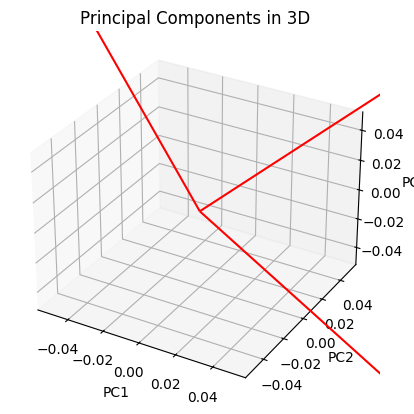

Values Before
Covariance Matrix:
[[1.0002442  0.8636258  0.82428732]
 [0.8636258  1.0002442  0.8176574 ]
 [0.82428732 0.8176574  1.0002442 ]]

Eigenvalues:
[2.67079057 0.19358658 0.13635545]

Eigenvectors:
[[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]
 [ 0.73209245 -0.67890274 -0.0559617 ]]


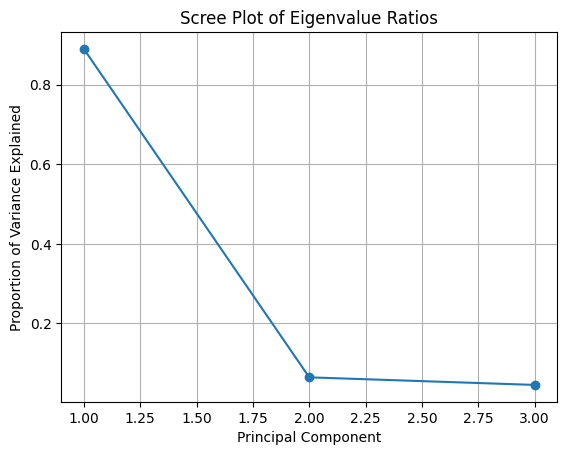

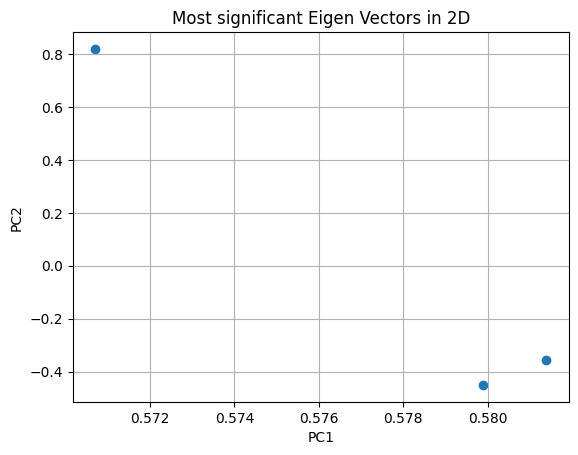

Percentage of variance covered: 95.45592807167903

Values After
Covariance Matrix:
[[2.67079057e+00 3.45294272e-16]
 [3.45294272e-16 1.93586583e-01]]

Eigenvalues:
[2.67079057 0.19358658]

Eigenvectors:
[[ 0.58139025  0.57989717  0.57070539]
 [-0.35500143 -0.4503447   0.81924578]]


In [3]:
# Requirement 1

# TODO: Load the JPG image "Forest_1.jpg"
image = io.imread("Forest_1.jpg")

# TODO: Convert the image to a 2D array of pixel values
pixels = image.reshape(-1, 3)

# TODO: Scale the data to have zero mean and unit variance along each feature axis.
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)

# TODO: Perform PCA with 3 components
pca = PCA(n_components=3)
pca.fit(scaled_pixels)

# TODO: Screen plot of the eigen vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = [0, 0, 0]
for i, component in enumerate(pca.components_):
    ax.quiver(*origin, *component, color='r', length=3)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Principal Components in 3D')
plt.show()

print("Values Before\n============")
print("Covariance Matrix:")
print(pca.get_covariance())
print("\nEigenvalues:")
print(pca.explained_variance_)
print("\nEigenvectors:")
print(pca.components_)

# Plot the scree plot of the eigenvalue ratios
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot of Eigenvalue Ratios')
plt.grid(True)
plt.show()

# TODO: Remove the lowest unimportant PC
pca.n_components = 2
reduced_pixels = pca.fit_transform(scaled_pixels)

# Plot the most significant eigen vectors in 2D
plt.figure()
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Most significant Eigen Vectors in 2D')
plt.grid(True)
plt.show()

# Calculate the percentage of variance covered
variance_covered = sum(pca.explained_variance_ratio_) * 100
print("Percentage of variance covered:", variance_covered)

# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
print("\nValues After\n============")
print("Covariance Matrix:")
print(np.cov(reduced_pixels.T))
print("\nEigenvalues:")
print(pca.explained_variance_)
print("\nEigenvectors:")
print(pca.components_)

# Commentary on the result
# The first principal component now explains most of the variance, while the second captures less.
# The eigenvectors remain unchanged as they represent the directions of maximum variance in the original feature space.
# The values of the covariance matrix after the reduction are smaller (almost zeros) because there are no correlation between the features

## R2- Apply PCA to satellite image

To implement PCA on a satellite image, the same afromentioned steps are undertaken:

### Requirements
- Apply PCA without loss.
- Show the covariance matrix.
- Show the Eigen Values and Vectors.
- Choose the three most significant axis.
- Plot the most significant eigen vectors in 3D.
- State the percentage of variance covered and provide commentary on its significance.
- Q: What can be achieved now by the transformed image?


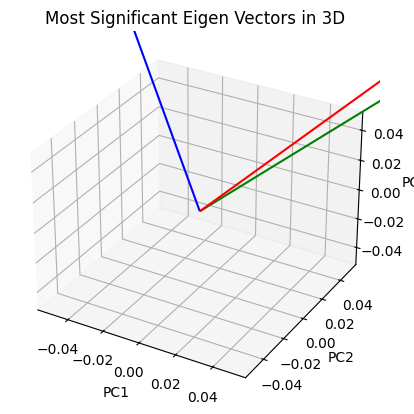

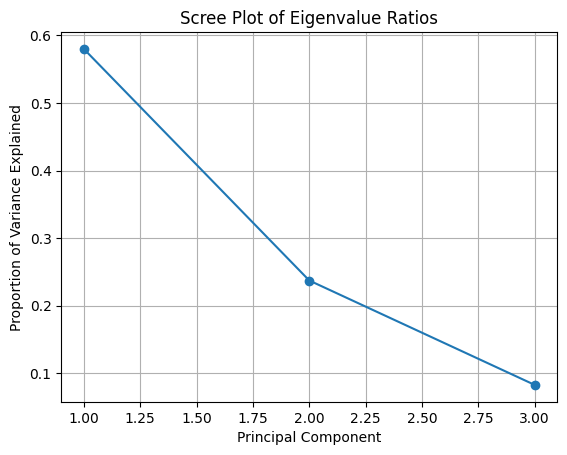

Percentage of variance covered: 90.03051968077614

Covariance Matrix:
[[0.93840121 0.63091511 0.65598255 0.64691093 0.78957246 0.36010965
  0.27210328 0.2366361  0.45529603 0.57970124 0.79686535 0.80889365
  0.34285192]
 [0.63091511 1.00540726 0.850764   0.8812876  0.78823154 0.26838506
  0.17154226 0.20821166 0.28498211 0.1252201  0.76116362 0.82041565
  0.23395357]
 [0.65598255 0.850764   1.0151976  0.83001227 0.84703589 0.4877118
  0.39888659 0.41014119 0.47142666 0.14447658 0.82866109 0.82676197
  0.45696829]
 [0.64691093 0.8812876  0.83001227 1.03099659 0.77289582 0.16990416
  0.06800772 0.11143022 0.21120519 0.16141062 0.74418009 0.83129769
  0.13459711]
 [0.78957246 0.78823154 0.84703589 0.77289582 1.03269667 0.55453844
  0.46349868 0.44077385 0.57864883 0.38203737 0.90017344 0.87807263
  0.53007561]
 [0.36010965 0.26838506 0.4877118  0.16990416 0.55453844 1.0838156
  0.944591   0.86205303 0.83519825 0.12793459 0.57674918 0.36655969
  0.95404057]
 [0.27210328 0.17154226 0.398886

In [5]:
# Requirement 2

# TODO: Load the TIF image "Forest_27.tif"
image = io.imread("Forest_27.tif")

# TODO: Convert the image to a 2D array of pixel values
pixels = image.reshape(-1, image.shape[2])

# TODO: Scale the data to have zero mean and unit variance along each feature axis.
scaler = StandardScaler()
scaled_pixels = scaler.fit_transform(pixels)

# TODO: Perform PCA 
pca = PCA()
pca.fit(scaled_pixels)

# TODO: Keep the 3 most significant PCs
pca.n_components = 3
transformed_data = pca.fit_transform(scaled_pixels)

# TODO: Plot the graph of the PCA vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
eigen_vectors = pca.components_
ax.quiver(0, 0, 0, eigen_vectors[0, 0], eigen_vectors[0, 1], eigen_vectors[0, 2], color='r')
ax.quiver(0, 0, 0, eigen_vectors[1, 0], eigen_vectors[1, 1], eigen_vectors[1, 2], color='g')
ax.quiver(0, 0, 0, eigen_vectors[2, 0], eigen_vectors[2, 1], eigen_vectors[2, 2], color='b')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Most Significant Eigen Vectors in 3D')
plt.show()

# Plot the scree plot of the eigenvalue ratios
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot of Eigenvalue Ratios')
plt.grid(True)
plt.show()

# Calculate the percentage of variance covered
variance_covered = sum(pca.explained_variance_ratio_) * 100
print("Percentage of variance covered:", variance_covered)

# TODO: Print the covariance matrix, eigenvalues, and eigen vectors and comment on the result.
print("\nCovariance Matrix:")
print(pca.get_covariance())
print("\nEigenvalues:")
print(pca.explained_variance_)
print("\nEigenvectors:")
print(pca.components_)

# Comment on the results
# These results indicate that PCA successfully captured the most significant patterns in the satellite image data.
# The high percentage of variance covered (90.03%) suggests that the transformed image retains a substantial amount of information 
# while reducing its dimensionality. This reduction can lead to more efficient storage, processing, and analysis of the image data.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
